In [1]:
import numpy as np
import pandas as pd
import pickle 
from matplotlib import pyplot as plt

from sklearn.metrics import mean_squared_error

In [2]:
with open('../oofs/e002_2019-02-03-15-07-47_3.653_oofs.pkl', 'rb') as fin:
    e002_oof = pickle.load(fin)

In [3]:
# きちんと stratified されているかを調査
outliers = pd.read_pickle('../inputs/train/outliers.pkl.gz')
for oof in e002_oof[0]:
    print(outliers[oof].sum())

442
442
441
441
441


In [16]:
# oof の切り方が正しいかを調査
pd.Series(np.concatenate(e002_oof[0])).duplicated().sum()

0

In [10]:
oof_df = pd.DataFrame(np.array([
    np.concatenate(e002_oof[0]),
    np.concatenate(e002_oof[1]),
]).T, columns=['idx', 'y_pred']
).sort_values('idx')
oof_df.head()

,idx,y_pred
0,0.0,-0.281701
1,1.0,-0.306339
2,2.0,0.414555
3,3.0,0.101766
4,4.0,-0.062752


In [11]:
# non-outliers に overfit してる...？
oof_df['target'] = pd.read_pickle('../inputs/train/target.pkl.gz')
oof_df['outliers'] = pd.read_pickle('../inputs/train/outliers.pkl.gz').astype(bool)
oof_df['se'] = (oof_df.y_pred - oof_df.target)**2
print(f'RMSE: {np.sqrt(oof_df.se.mean()):.4}, out-RMSE: {np.sqrt(oof_df[oof_df.outliers].se.mean()):.4}, non-RMSE: {np.sqrt(oof_df[~oof_df.outliers].se.mean()):.5}, ')
oof_df.head()

RMSE: 3.664, out-RMSE: 30.41, non-RMSE: 1.8312, 


,idx,y_pred,target,outliers,se
0,0.0,-0.281701,-0.820283,False,0.290070
1,1.0,-0.306339,0.392913,False,0.488954
2,2.0,0.414555,0.688056,False,0.074803
3,3.0,0.101766,0.142495,False,0.001659
4,4.0,-0.062752,-0.159749,False,0.009408


### best ではどうかを見てみる

In [4]:
# outliers があばれてる...？
with open('../oofs/e002_2019-01-22-02-58-36_3.673_oofs.pkl', 'rb') as fin:
    best_oof = pickle.load(fin)

best_oof_df = pd.DataFrame(np.array([
    np.concatenate(best_oof[0]),
    np.concatenate(best_oof[1]),
]).T, columns=['idx', 'y_pred']
).sort_values('idx')
best_oof_df.head()

best_oof_df['target'] = pd.read_pickle('../inputs/train/target.pkl.gz')
best_oof_df['outliers'] = pd.read_pickle('../inputs/train/outliers.pkl.gz').astype(bool)
best_oof_df['se'] = (best_oof_df.y_pred - best_oof_df.target)**2
print(f'RMSE: {np.sqrt(best_oof_df.se.mean()):.4}, out-RMSE: {np.sqrt(best_oof_df[best_oof_df.outliers].se.mean()):.4}, non-RMSE: {np.sqrt(best_oof_df[~best_oof_df.outliers].se.mean()):.5}, ')
best_oof_df.head()

RMSE: 3.684, out-RMSE: 30.63, non-RMSE: 1.8311, 


,idx,y_pred,target,outliers,se
0,0.0,-0.205042,-0.820283,False,0.378521
1,1.0,-0.214007,0.392913,False,0.368353
2,2.0,0.577901,0.688056,False,0.012134
3,3.0,0.039588,0.142495,False,0.010590
4,4.0,0.025017,-0.159749,False,0.034139


In [8]:
best_oof_df.query('target < -20').idx.count(), best_oof_df.query('target < -30').idx.count()

(2207, 2207)

### y_pred の分布を比べてみる

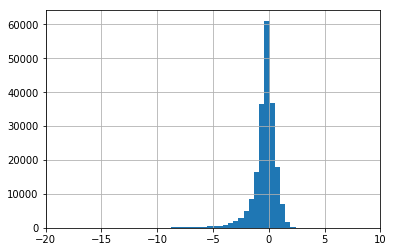

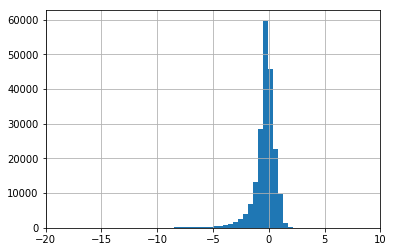

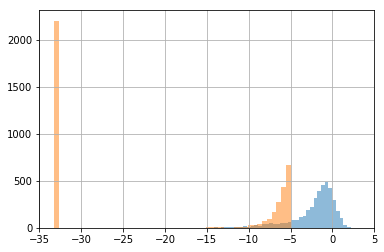

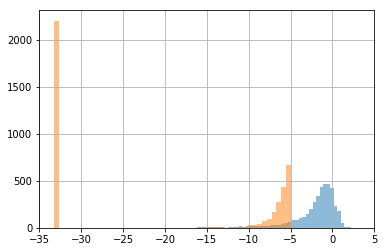

In [30]:
oof_df.y_pred.hist(bins=50)
plt.xlim(-20, 10)
plt.show()
best_oof_df.y_pred.hist(bins=50), 
plt.xlim(-20, 10)
plt.show()

oof_df.query('target < -5').y_pred.hist(bins=50, alpha=0.5)
oof_df.query('target < -5').target.hist(bins=50, alpha=0.5)
plt.xlim(-35, 5)
plt.show()
best_oof_df.query('target < -5').y_pred.hist(bins=50, alpha=0.5), 
best_oof_df.query('target < -5').target.hist(bins=50, alpha=0.5), 
plt.xlim(-35, 5)
plt.show()

In [32]:
oof_df.query('y_pred < -5').y_pred.count(), best_oof_df.query('y_pred < -5').y_pred.count()

(2114, 2005)

In [33]:
best_oof_df.query('y_pred < -10').y_pred.count(), oof_df.query('y_pred < -10').y_pred.count()

(238, 295)

In [34]:
best_oof_df.y_pred.min(), oof_df.y_pred.min()

(-18.753209861916492, -18.586921078539334)

### submission を比べてみる

In [3]:
best_sub = pd.read_csv('../submissions/e002_2019-01-22-02-58-36_3.673_sub.csv.gz')
latest_sub = pd.read_csv('../submissions/e002_2019-02-03-15-07-47_3.653_sub.csv.gz')

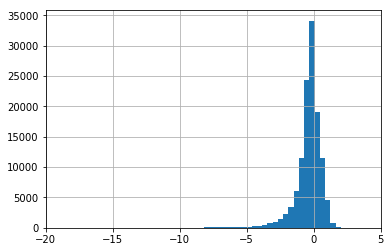

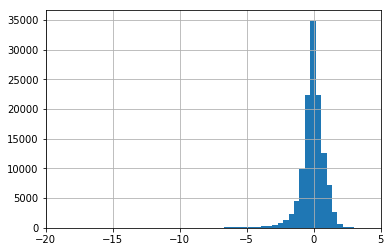

In [59]:
# パット見は変わってない
best_sub.target.hist(bins=50)
plt.xlim(-20, 5)
plt.show()
latest_sub.target.hist(bins=50), 
plt.xlim(-20, 5)
plt.show()

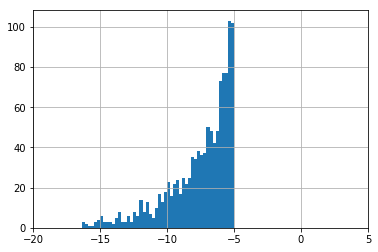

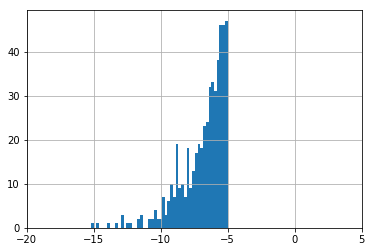

In [61]:
# best の方が outlier ぽいって認識しがち...？
best_sub.query('target < -5').target.hist(bins=50)
plt.xlim(-20, 5)
plt.show()
latest_sub.query('target < -5').target.hist(bins=50), 
plt.xlim(-20, 5)
plt.show()

In [8]:
import seaborn as sns
np.corrcoef(best_sub.target, latest_sub.target)

array([[1.        , 0.85830684],
       [0.85830684, 1.        ]])

In [31]:
best_sub.query('target < -5').target.count(), latest_sub.query('target < -5').target.count(), 

(1152, 518)

In [36]:
best_sub.target.min(), latest_sub.target.min(), 

(-16.37372472497683, -15.222742989601786)

## train と test の features を比較